In [1]:
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
np.random.seed(7)

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

Python version :  3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
TensorFlow version :  2.2.0
Keras version :  2.3.1


Using TensorFlow backend.


<function matplotlib.pyplot.show(*args, **kw)>

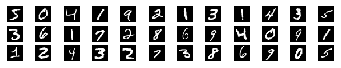

In [2]:
from keras.datasets import mnist
mnist = keras.datasets.mnist

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

import matplotlib.pylab as plt

plt.figure(figsize = (6, 1))
for i in range(36):
    plt.subplot(3, 12, i+1)
    plt.imshow(X_train0[i], cmap = "gray")
    plt.axis("off")
plt.show

In [4]:
for x in X_train0[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [5]:
from keras.datasets import mnist
mnist = keras.datasets.mnist

img_rows = 28
img_cols = 28

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('x_train shape : ', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'train samples')

batch_size = 128
num_classes = 10
epochs = 12

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape :  (60000, 28, 28, 1)
60000 train samples
10000 train samples


In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (5, 5), strides = (1, 1), padding = 'same', 
                activation = 'relu', 
                input_shape=input_shape))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
model.add(Conv2D(64, (2, 2), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)             

In [8]:
model.compile(loss = 'categorical_crossentropy', 
             optimizer = 'adam', metrics = ['accuracy'])
hist = model.fit(x_train, y_train,
                batch_size = batch_size,
                epochs = epochs,
                verbose = 1,
                validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 58s 963us/step - loss: 0.0160 - accuracy: 0.9947 - val_loss: 0.0217 - val_accuracy: 0.9929
Epoch 2/12
60000/60000 [==============================] - 58s 959us/step - loss: 0.0138 - accuracy: 0.9956 - val_loss: 0.0264 - val_accuracy: 0.9915
Epoch 3/12
60000/60000 [==============================] - 57s 953us/step - loss: 0.0118 - accuracy: 0.9959 - val_loss: 0.0232 - val_accuracy: 0.9917
Epoch 4/12
60000/60000 [==============================] - 57s 958us/step - loss: 0.0118 - accuracy: 0.9961 - val_loss: 0.0220 - val_accuracy: 0.9931
Epoch 5/12
60000/60000 [==============================] - 57s 956us/step - loss: 0.0111 - accuracy: 0.9962 - val_loss: 0.0240 - val_accuracy: 0.9935
Epoch 6/12
60000/60000 [==============================] - 59s 982us/step - loss: 0.0104 - accuracy: 0.9963 - val_loss: 0.0264 - val_accuracy: 0.9932
Epoch 7/12
60000/60000 [==============================] 

Test loss :  0.033262278952644435
test accuracy :  0.9927999973297119


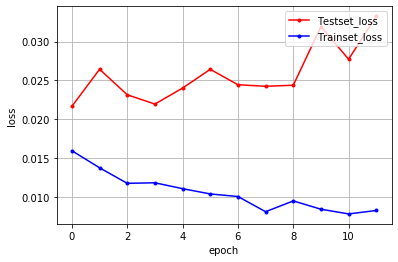

In [9]:
model.compile(loss = 'categorical_crossentropy', 
             optimizer = 'adam', metrics = ['accuracy'])
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss : ', score[0])
print('test accuracy : ', score[1])

import numpy as np

y_vloss = hist.history['val_loss']
y_loss = hist.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = "red", label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = "blue", label = 'Trainset_loss')
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

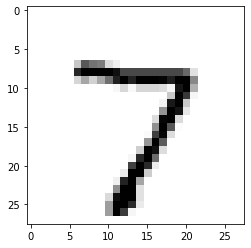

The Answer is  [7]


In [10]:
n = 0
plt.imshow(x_test[n].reshape(28, 28), cmap = 'Greys', interpolation = 'nearest')
plt.show()
print('The Answer is ', model.predict_classes(x_test[n].reshape((1, 28, 28, 1))))